In [1]:
#Author Kanishk Asthana kasthana@ucsd.edu
#Warning Need at least 40GB Memory for this Script

In [30]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import os

In [46]:
time_tags_file="~/kanishk2/hg19/March2024BulkK562Experiments4H_Monitoring_ChronoseqV4/K562_BULK_LPS_STIMULATION_AFTER1H/K562_BULK_LPS_STIMULATION_AFTER1H_PART_1/K562_BULK_LPS_STIMULATION_AFTER1H.aligned.sorted.merged.tagged.time_tags.csv"
dge_file="~/kanishk2/hg19/March2024BulkK562Experiments4H_Monitoring_ChronoseqV4/K562_BULK_LPS_STIMULATION_AFTER1H/K562_BULK_LPS_STIMULATION_AFTER1H_PART_1/K562_BULK_LPS_STIMULATION_AFTER1H.aligned.sorted.merged.tagged.dge.txt.gz"
time_tags_file=os.path.expanduser(time_tags_file)
dge_file=os.path.expanduser(dge_file)

In [47]:
newFileName=dge_file.split('.')[0:-2]
newFileName=".".join(newFileName)+".time_tags"

### Combining Time Tag Data into a Single Dataframe for all 24 Timepoints Collected

In [4]:
# Reading in Time Tags data and removing Time Tags where a Collision is detected. Dropping individual counts columns.
timetagdf = pd.read_table(time_tags_file, sep = "\t")
timetagdf=timetagdf[~timetagdf["FINAL TIME TAG"].str.contains("Collision Detected")] #Removing Cell Barcodes with Collision in Time-Tag Determination
timetagdf=timetagdf.iloc[:,0:3]
timetagdf=timetagdf.drop("TIME TAG COUNTS", axis=1)

,CELL BARCODES,FINAL TIME TAG
0,CACCGATGGACC,SEQ4_TTCC
1,TGCCACAATTGC,SEQ10_GGTT
2,ACAAGCCATATT,SEQ12_GGGG
3,AGCATAGGCCGT,SEQ5_TTAA
4,TATTAAGAGCCA,SEQ5_TTAA


In [6]:
#To Convert Alphanumeric Values to Integer Time-Tag Values
time_tags_dict={
 "SEQ1_TTGG":1,
 "SEQ2_CCTT":2,
 "SEQ3_GGAA":3,
 "SEQ4_TTCC":4,
 "SEQ5_TTAA":5,
 "SEQ6_TTTT":6,
 "SEQ7_CCAA":7,
 "SEQ8_CCGG":8,
 "SEQ9_CCCC":9,
 "SEQ10_GGTT":10,
 "SEQ11_GGCC":11,
 "SEQ12_GGGG":12
}

In [7]:
#Replace Values with Integer Values
timetagdf["FINAL TIME TAG"]=timetagdf["FINAL TIME TAG"].replace(time_tags_dict)

### Combining DGE Matrices for the First Two Hours and Last Two Hours into a Single DGE

In [9]:
#Reading in Digital Gene Expression Matrix. Taking Transpose and resetting the index. 
control_df=pd.read_table(dge_file).T
control_df=control_df.reset_index()
control_df.iloc[0,0]="CELL BARCODES"
control_df.columns=control_df.iloc[0]
control_df=control_df.drop(index=0)
control_df["COUNTS"]=control_df.iloc[:,1:].sum(axis=1)

,CELL BARCODES,A1BG,A1BG-AS1,A1CF,A2M,A4GALT,AAAS,AACS,AADACL4,AAED1,...,ZZZ3,hsa-mir-1199,hsa-mir-125a,hsa-mir-150,hsa-mir-335,hsa-mir-490,hsa-mir-6080,hsa-mir-8072,snoU2-30,COUNTS
1,CTGTCTCTTATA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,47.0
2,TTCCCCTCCCTA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5438.0
3,TGTCTCTTATAC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.0
4,TTTTCCAACCCT,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,6611.0
5,TCCTGTCTCTTA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0


### Combining the Time Tags with DGE Information

In [11]:
combinedDGE=control_df.merge(timetagdf, on="CELL BARCODES")

,CELL BARCODES,A1BG,A1BG-AS1,A1CF,A2M,A4GALT,AAAS,AACS,AADACL4,AAED1,...,hsa-mir-1199,hsa-mir-125a,hsa-mir-150,hsa-mir-335,hsa-mir-490,hsa-mir-6080,hsa-mir-8072,snoU2-30,COUNTS,FINAL TIME TAG
0,TTCCCCTCCCTA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5438.0,4
1,TTTCGTCATCTT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3220.0,4
2,CGACTCAGCTCC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2165.0,2
3,GTGCTTGACTTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3272.0,6
4,GCATTGAAATAT,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1718.0,4


In [22]:
time_tag_counts=combinedDGE.groupby("FINAL TIME TAG").count().iloc[:,0:1]
time_tag_counts.to_csv(newFileName+".time_tag_counts_summary.csv",index=False)

In [23]:
#Sorting by Final Time Tag
combinedDGE=combinedDGE.sort_values("FINAL TIME TAG")

### Plotting Average Unique Counts per Time-Tag Beads

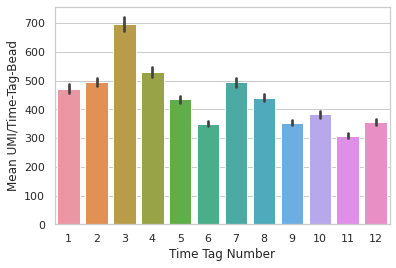

In [48]:
#Plotting Average Unique Counts Detected per Cell Barcode for Each Time Tag
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="FINAL TIME TAG", y="COUNTS", data=combinedDGE)
ax.set(ylabel="Mean UMI/Time-Tag-Bead")
ax.set(xlabel="Time Tag Number")
fig=ax.get_figure()
fig.savefig(newFileName+".Tags_counts_bar_plot.png",dpi=600)

In [51]:
combinedDGE.to_csv(newFileName+".csv.gz",index=False,compression="gzip")